In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 3 # L of square grid

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


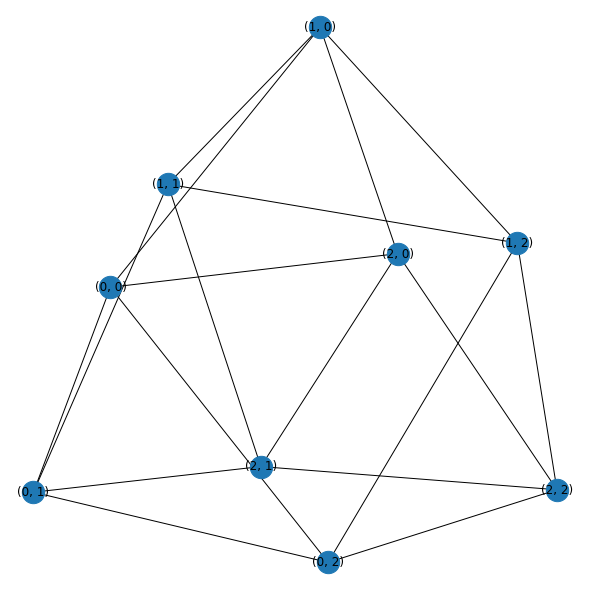

In [4]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [5]:
model_2d_h0_spinglass = model.model(N, H, J, J_interaction)
res_ex_2d_h0_spinglass = solvers.exact_sol(model_2d_h0_spinglass, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -1.3e-06 M: 1.58e-17 S: 0.693
beta: 0.1, Fe: -6.996 Energy: -0.13 M: 5.45e-18 S: 0.687
beta: 0.2, Fe: -3.595 Energy: -0.254 M: 1.9e-17 S: 0.668
beta: 0.3, Fe: -2.500 Energy: -0.366 M: 3.23e-17 S: 0.64
beta: 0.4, Fe: -1.979 Energy: -0.461 M: -1.27e-18 S: 0.607
beta: 0.5, Fe: -1.683 Energy: -0.539 M: -4.86e-18 S: 0.572
beta: 0.6, Fe: -1.498 Energy: -0.601 M: 2.23e-17 S: 0.538
beta: 0.7, Fe: -1.373 Energy: -0.65 M: -3.86e-18 S: 0.506
beta: 0.8, Fe: -1.286 Energy: -0.69 M: -3.62e-17 S: 0.477
beta: 0.9, Fe: -1.221 Energy: -0.722 M: 3.48e-17 S: 0.45
beta: 1.0, Fe: -1.173 Energy: -0.747 M: 8.58e-18 S: 0.425
beta: 1.1, Fe: -1.135 Energy: -0.768 M: -9.5e-18 S: 0.403
beta: 1.2, Fe: -1.105 Energy: -0.786 M: 1.32e-17 S: 0.383
beta: 1.3, Fe: -1.081 Energy: -0.801 M: -3.57e-18 S: 0.364
beta: 1.4, Fe: -1.062 Energy: -0.814 M: -4.7e-18 S: 0.347
beta: 1.5, Fe: -1.045 Energy: -0.825 M: 2.42e-17 S: 0.331
beta: 1.6, Fe: -1.032 Energy: -0.834 M: -9.24e-19 S: 0.316
beta: 1

In [6]:
res_nn_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_2d_h0_spinglass["name"]="nn"

fe: -693147.180 std_fe: 5.15E-02 M: 0.003 S: 0.693 E: 0.002: -0.015679722
fe: -6.996 std_fe: 1.05E-02 M: -0.000 S: 0.686 E: -0.133-0.002679
fe: -3.594 std_fe: 2.05E-02 M: -0.005 S: 0.669 E: -0.251-0.016489
fe: -2.499 std_fe: 2.93E-02 M: -0.001 S: 0.640 E: -0.364-0.011889
fe: -1.976 std_fe: 3.65E-02 M: -0.002 S: 0.611 E: -0.4490.0091144
fe: -1.679 std_fe: 4.16E-02 M: 0.005 S: 0.573 E: -0.534 0.0148899
fe: -1.492 std_fe: 4.53E-02 M: -0.005 S: 0.545 E: -0.584-0.034297
fe: -1.367 std_fe: 4.77E-02 M: -0.006 S: 0.513 E: -0.6350.0017860
fe: -1.277 std_fe: 4.69E-02 M: 0.003 S: 0.484 E: -0.672 -0.027139
fe: -1.212 std_fe: 4.60E-02 M: 0.001 S: 0.454 E: -0.707 -0.012324
fe: -1.163 std_fe: 4.50E-02 M: 0.003 S: 0.430 E: -0.733 -0.004340
fe: -1.125 std_fe: 4.18E-02 M: -0.003 S: 0.400 E: -0.7610.0017824
fe: -1.096 std_fe: 4.00E-02 M: 0.001 S: 0.382 E: -0.778 0.0048914
fe: -1.072 std_fe: 3.60E-02 M: -0.003 S: 0.357 E: -0.7970.0011114
fe: -1.053 std_fe: 3.27E-02 M: -0.003 S: 0.335 E: -0.814-0.004987
fe

In [7]:
res_nn_z2_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2_2d_h0_spinglass["name"]="nn_z2"

fe: -693147.174 std_fe: 3.46E-02 M: 0.001 S: 0.693 E: -0.002 -0.006222077
fe: -6.996 std_fe: 9.75E-03 M: 0.005 S: 0.686 E: -0.132 0.0327337
fe: -3.595 std_fe: 7.86E-03 M: -0.005 S: 0.667 E: -0.261-0.014784
fe: -2.500 std_fe: 1.26E-02 M: 0.004 S: 0.640 E: -0.368 -0.000889
fe: -1.978 std_fe: 1.79E-02 M: 0.002 S: 0.606 E: -0.464 -0.008220
fe: -1.682 std_fe: 2.23E-02 M: 0.004 S: 0.573 E: -0.537 -0.001784
fe: -1.497 std_fe: 2.57E-02 M: -0.008 S: 0.539 E: -0.598-0.006334
fe: -1.371 std_fe: 2.84E-02 M: 0.003 S: 0.509 E: -0.643 0.0242672
fe: -1.282 std_fe: 2.99E-02 M: -0.005 S: 0.482 E: -0.679-0.028717
fe: -1.218 std_fe: 3.03E-02 M: 0.003 S: 0.447 E: -0.721 -0.004672
fe: -1.170 std_fe: 2.61E-02 M: 0.006 S: 0.428 E: -0.742 0.0182222
fe: -1.132 std_fe: 2.38E-02 M: 0.003 S: 0.407 E: -0.762 -0.027127
fe: -1.102 std_fe: 2.22E-02 M: -0.005 S: 0.377 E: -0.788-0.019619
fe: -1.079 std_fe: 2.12E-02 M: 0.001 S: 0.360 E: -0.802 -0.003334
fe: -1.059 std_fe: 1.92E-02 M: -0.004 S: 0.343 E: -0.815-0.004440
fe

In [8]:
res_bp_2d_h0_spinglass = solvers.bp_sol(model_2d_h0_spinglass, betas_fast)
res_bp_2d_h0_spinglass["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.996, ener: -0.129, M: 0.000, iter 6
fe: -3.594, ener: -0.252, M: -0.000, iter 7
fe: -2.499, ener: -0.366, M: -0.000, iter 9
fe: -1.979, ener: -0.467, M: -0.000, iter 10
fe: -1.685, ener: -0.556, M: 0.000, iter 12
fe: -1.504, ener: -0.633, M: 0.000, iter 15
fe: -1.384, ener: -0.700, M: 0.000, iter 19
fe: -1.302, ener: -0.758, M: 0.000, iter 24
fe: -1.245, ener: -0.809, M: 0.000, iter 35
fe: -1.204, ener: -0.854, M: 0.000, iter 48
fe: -1.174, ener: -0.892, M: 0.000, iter 85
fe: -1.152, ener: -0.927, M: 0.000, iter 277
fe: -1.123, ener: -0.945, M: 0.022, iter 1000
fe: -1.148, ener: -0.992, M: -0.113, iter 1000
fe: -1.090, ener: -0.994, M: 0.055, iter 1000
fe: -1.091, ener: -0.973, M: 0.103, iter 1000
fe: -1.067, ener: -0.948, M: -0.010, iter 1000
fe: -1.141, ener: -1.054, M: 0.183, iter 1000
fe: -1.057, ener: -0.962, M: 0.092, iter 1000
fe: -1.051, ener: -0.969, M: -0.127, iter 1000


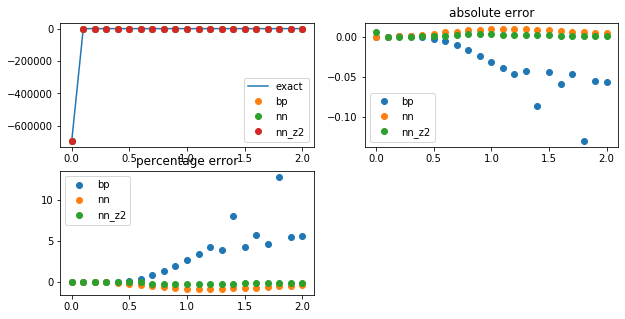

In [12]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass])
#plt.ylim(-0.1,0.11)
plt.show()

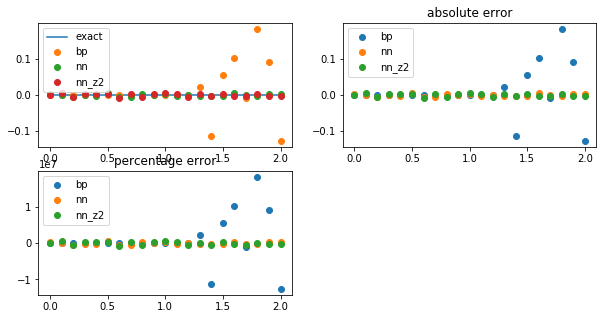

In [13]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass])
plt.show()

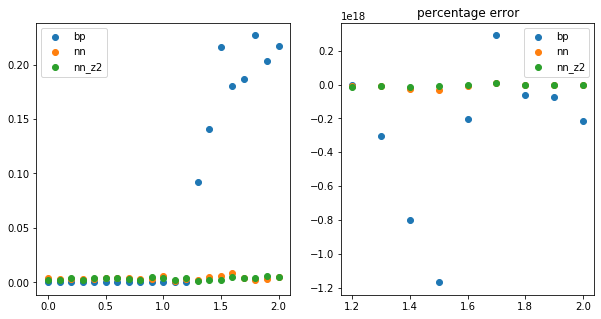

In [14]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass])
plt.show()

# With random field

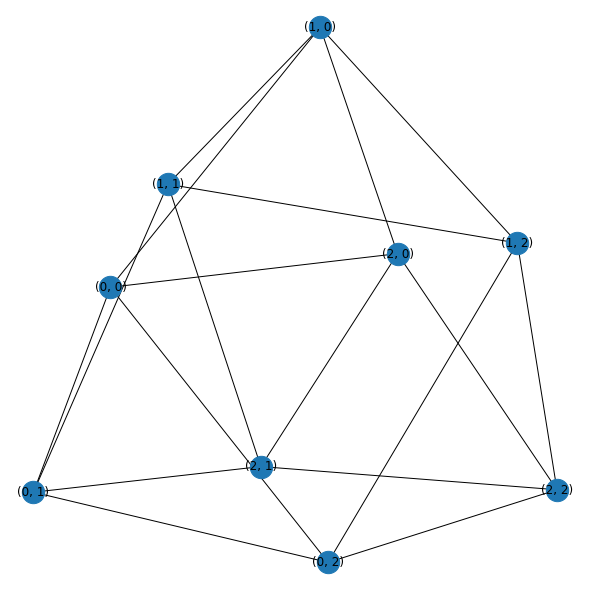

In [15]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)
H_intes = 5
H = 2. * H_intes * np.random.random(N)-H_intes
#H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [16]:
H

array([-2.45226959,  0.7811416 ,  4.55327977, -3.02968078, -2.52868401,
       -1.34750274,  0.57027818, -2.51583589,  2.69094404])

In [18]:
model_rf = model.model(N, H, J, J_interaction)

res_ex_rf = solvers.exact_sol(model_rf, betas_fast)

res_nn_rf = solvers.nn_sol(model_rf, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_rf["name"]="nn"

res_bp_rf= solvers.bp_sol(model_rf, betas_fast)
res_bp_rf["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -9.32e-06 M: -3.64e-07 S: 0.693
beta: 0.1, Fe: -7.369 Energy: -0.836 M: -0.0162 S: 0.653
beta: 0.2, Fe: -4.251 Energy: -1.38 M: -0.018 S: 0.575
beta: 0.3, Fe: -3.349 Energy: -1.69 M: -0.0187 S: 0.498
beta: 0.4, Fe: -2.959 Energy: -1.88 M: -0.015 S: 0.433
beta: 0.5, Fe: -2.756 Energy: -2.0 M: -0.00627 S: 0.376
beta: 0.6, Fe: -2.639 Energy: -2.09 M: 0.00513 S: 0.327
beta: 0.7, Fe: -2.566 Energy: -2.16 M: 0.0171 S: 0.284
beta: 0.8, Fe: -2.518 Energy: -2.21 M: 0.0284 S: 0.246
beta: 0.9, Fe: -2.487 Energy: -2.25 M: 0.0387 S: 0.212
beta: 1.0, Fe: -2.465 Energy: -2.28 M: 0.0479 S: 0.182
beta: 1.1, Fe: -2.449 Energy: -2.31 M: 0.056 S: 0.156
beta: 1.2, Fe: -2.438 Energy: -2.33 M: 0.0631 S: 0.134
beta: 1.3, Fe: -2.430 Energy: -2.34 M: 0.0694 S: 0.115
beta: 1.4, Fe: -2.424 Energy: -2.35 M: 0.0749 S: 0.0981
beta: 1.5, Fe: -2.420 Energy: -2.36 M: 0.0797 S: 0.0841
beta: 1.6, Fe: -2.417 Energy: -2.37 M: 0.084 S: 0.0721
beta: 1.7, Fe: -2.414 Energy: -2.38 M: 0.0877 S

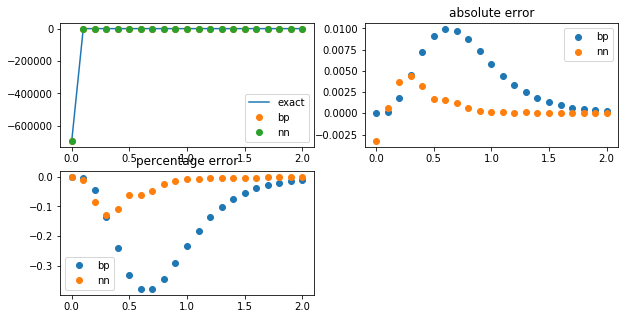

In [20]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_rf, [res_bp_rf, res_nn_rf])
#plt.ylim(-0.01,0.01)
plt.show()

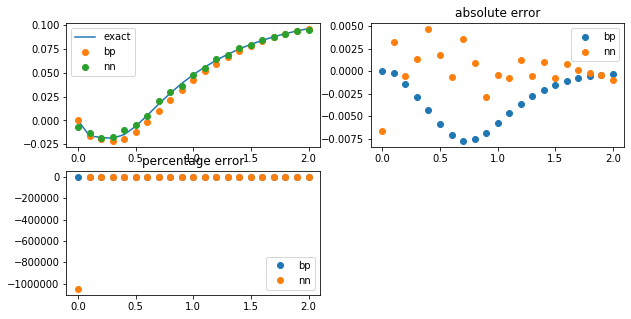

In [21]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex_rf, [res_bp_rf, res_nn_rf])
plt.show()

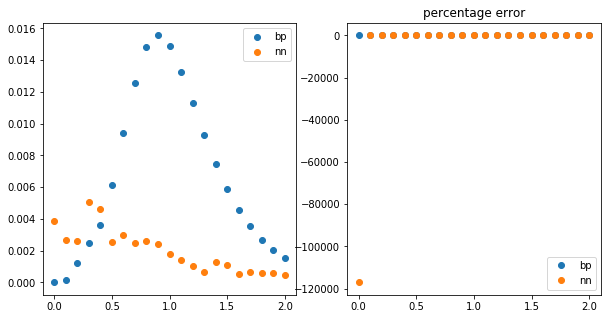

In [22]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_rf, [res_bp_rf, res_nn_rf])
plt.legend()
plt.show()

# J +-1

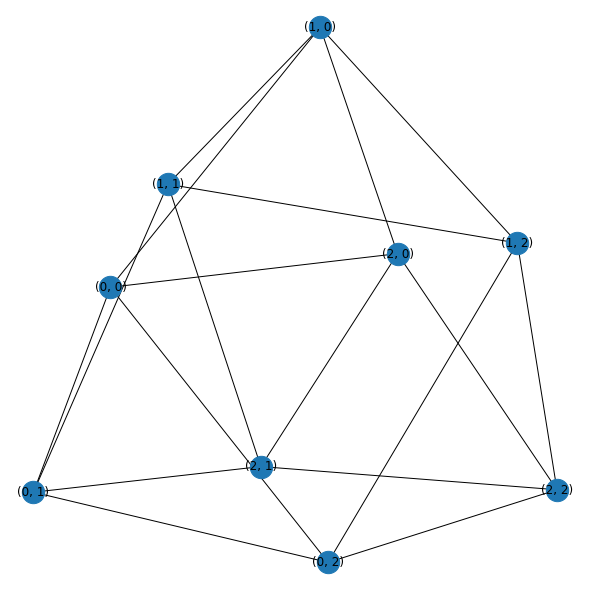

In [23]:
import graph_gen
import imp
imp.reload(graph_gen)
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass_one()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [24]:
model_j1 = model.model(N, H, J, J_interaction)
res_ex_j1 = solvers.exact_sol(model_j1, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -2e-06 M: 1.89e-17 S: 0.693
beta: 0.1, Fe: -7.029 Energy: -0.194 M: -8.65e-18 S: 0.684
beta: 0.2, Fe: -3.658 Energy: -0.378 M: 0.0 S: 0.656
beta: 0.3, Fe: -2.593 Energy: -0.545 M: 4.36e-18 S: 0.615
beta: 0.4, Fe: -2.100 Energy: -0.689 M: -5.06e-18 S: 0.564
beta: 0.5, Fe: -1.830 Energy: -0.805 M: 1.81e-18 S: 0.512
beta: 0.6, Fe: -1.667 Energy: -0.895 M: -1.44e-18 S: 0.463
beta: 0.7, Fe: -1.561 Energy: -0.961 M: -2.93e-19 S: 0.42
beta: 0.8, Fe: -1.489 Energy: -1.01 M: -5.2e-18 S: 0.385
beta: 0.9, Fe: -1.438 Energy: -1.04 M: -9.68e-19 S: 0.357
beta: 1.0, Fe: -1.399 Energy: -1.06 M: -2.85e-18 S: 0.336
beta: 1.1, Fe: -1.369 Energy: -1.08 M: 2.79e-18 S: 0.32
beta: 1.2, Fe: -1.346 Energy: -1.09 M: 4.5e-18 S: 0.308
beta: 1.3, Fe: -1.326 Energy: -1.1 M: 3.12e-19 S: 0.299
beta: 1.4, Fe: -1.310 Energy: -1.1 M: 6.66e-19 S: 0.292
beta: 1.5, Fe: -1.296 Energy: -1.1 M: -7.78e-18 S: 0.288
beta: 1.6, Fe: -1.284 Energy: -1.11 M: -3.94e-18 S: 0.284
beta: 1.7, Fe: -1.274

In [25]:
res_nn_j1 = solvers.nn_sol(model_j1, betas_fast, max_step=500, 
                        bias = True, 
                        lr=0.01,
                        batch_size=1000,
                        z2 = False, x_hat_clip = False, stats=10)
res_nn_j1["name"]="nn"

res_nn_z2_j1 = solvers.nn_sol(model_j1, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2_j1["name"]="nn_z2"

fe: -693147.187 std_fe: 5.50E-02 M: 0.044 S: 0.693 E: 0.133 0.00711729442
fe: -7.021 std_fe: 3.59E-02 M: -0.133 S: 0.693 E: -0.089-0.007562
fe: -3.658 std_fe: 7.70E-02 M: -0.022 S: 0.607 E: -0.6220.0191119
fe: -2.641 std_fe: 1.09E-01 M: -0.022 S: 0.659 E: -0.4440.0002222
fe: -2.112 std_fe: 7.64E-02 M: -0.044 S: 0.596 E: -0.6220.0057812
fe: -1.827 std_fe: 5.35E-02 M: -0.067 S: 0.513 E: -0.8000.0057849
fe: -1.659 std_fe: 4.42E-02 M: 0.022 S: 0.462 E: -0.889 0.0142332
fe: -1.549 std_fe: 3.36E-02 M: -0.000 S: 0.369 E: -1.0220.0084492
fe: -1.455 std_fe: 6.26E-02 M: 0.022 S: 0.453 E: -0.889 -0.003339
fe: -1.428 std_fe: 1.26E-02 M: -0.089 S: 0.325 E: -1.067-0.006227
fe: -1.391 std_fe: 2.36E-02 M: 0.067 S: 0.369 E: -1.022 -0.003564
fe: -1.361 std_fe: 1.38E-02 M: -0.111 S: 0.275 E: -1.111-0.006679
fe: -1.344 std_fe: 1.59E-02 M: 0.022 S: 0.280 E: -1.111 0.0002229
fe: -1.324 std_fe: 1.53E-02 M: -0.156 S: 0.276 E: -1.111-0.002422
fe: -1.306 std_fe: 1.40E-02 M: 0.067 S: 0.336 E: -1.067 -0.013370
fe

In [27]:
imp.reload(solvers)
import bp_solver
imp.reload(bp_solver)
res_bp_j1 = solvers.bp_sol(model_j1, betas_fast, error=1e-4, )
res_bp_j1["name"]="bp"

fe: -693147.181, ener: -0.000, M: -0.000, iter 2
fe: -7.031, ener: -0.199, M: -0.000, iter 5
fe: -3.664, ener: -0.395, M: 0.000, iter 7
fe: -2.606, ener: -0.583, M: 0.000, iter 10
fe: -2.123, ener: -0.760, M: -0.000, iter 14
fe: -1.867, ener: -0.924, M: 0.000, iter 24
fe: -1.722, ener: -1.074, M: -0.000, iter 67
fe: -1.621, ener: -1.226, M: 0.121, iter 1000
fe: -1.495, ener: -1.193, M: -0.072, iter 1000
fe: -1.594, ener: -1.264, M: 0.042, iter 1000
fe: -1.461, ener: -1.175, M: -0.046, iter 1000
fe: -1.344, ener: -1.199, M: -0.102, iter 1000
fe: -1.309, ener: -1.333, M: 0.143, iter 1000
fe: -1.613, ener: -1.673, M: -0.302, iter 1000
fe: -1.471, ener: -1.586, M: 0.191, iter 1000
fe: -1.264, ener: -1.344, M: 0.141, iter 1000
fe: -1.447, ener: -1.170, M: -0.131, iter 1000
fe: -1.455, ener: -1.209, M: -0.112, iter 1000
fe: -1.513, ener: -1.219, M: -0.142, iter 1000
fe: -1.251, ener: -1.277, M: -0.115, iter 1000
fe: -1.248, ener: -1.258, M: -0.111, iter 1000


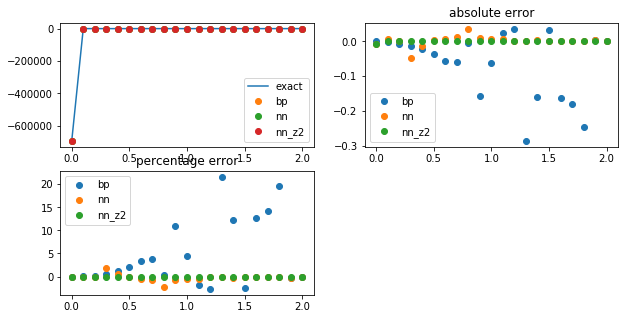

In [28]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

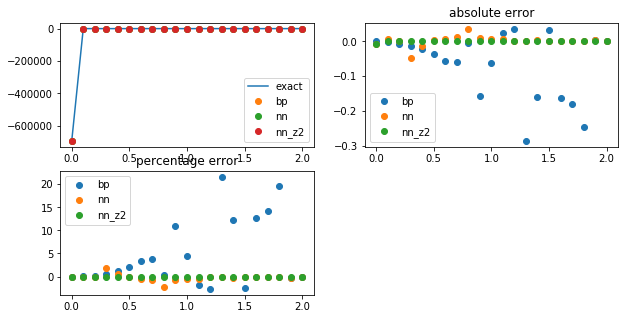

In [29]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

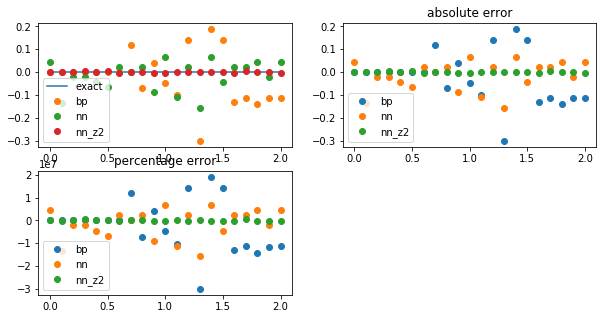

In [30]:
%matplotlib inline
label="M"
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

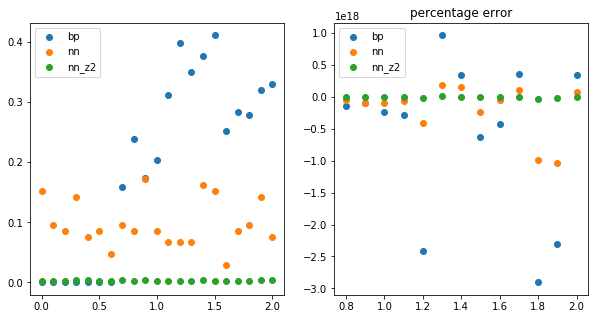

In [31]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
plt.legend()
plt.show()